In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Feb 10, 2020
@author: neeks, cmu
"""
import glob # for_listing_filenames_from_directory
import os # for_extracting_filename_from_path
import librosa # audio_processing_library
from yaafelib import *
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats 
import seaborn as sns 
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
sns.set_style("white")
sns.set_style("ticks")

# Build a DataFlow object using FeaturePlan

In [2]:
path_wav_files = '../lisTest/tcdDecision/playback/STIMULI/'
wav_folder_types = ['chinese','english']
file_types = ['nspkrs_1','nspkrs_2']

path_store_feats = './data/feats/'
feats_type = ['mfcc', 'mfcc_d1','mfcc_d2','engy','envp','mel','sflux','sroll','loudness']

In [3]:
# init feature params
blockSize = 400
stepSize = 160
fp = FeaturePlan(sample_rate=16000)
fp.addFeature('mfcc: MFCC blockSize=400 stepSize=160 CepsIgnoreFirstCoeff=1 CepsNbCoeffs=12')
fp.addFeature('mfcc_d1: MFCC blockSize=400 stepSize=160 CepsIgnoreFirstCoeff=1 CepsNbCoeffs=12 > Derivate DOrder=1')
fp.addFeature('mfcc_d2: MFCC blockSize=400 stepSize=160 CepsIgnoreFirstCoeff=1 CepsNbCoeffs=12 > Derivate DOrder=2')
fp.addFeature('engy: Energy blockSize=400  stepSize=160')
fp.addFeature('envp: EnvelopeShapeStatistics EnDecim=200  blockSize=400  stepSize=160')
fp.addFeature('loudness: Loudness FFTLength=0  FFTWindow=Hanning  LMode=Total blockSize=400 stepSize=160')
fp.addFeature('mel: MelSpectrum blockSize=400  stepSize=160')
fp.addFeature('sflux: SpectralFlux blockSize=400  stepSize=160')
fp.addFeature('sroll: SpectralRolloff blockSize=400  stepSize=160')

# init yaafe engine
engine = Engine()
engine.load(fp.getDataFlow())
engine.getInputs()
{'audio': {'sampleRate': 16000.0,
           'frameLength': 1,
           'sampleStep': 1,
           'parameters': {'SampleRate': '16000'},
           'size': 1}}

{'audio': {'sampleRate': 16000.0,
  'frameLength': 1,
  'sampleStep': 1,
  'parameters': {'SampleRate': '16000'},
  'size': 1}}

In [4]:
# read wav filenames with path
wav_files = []
for i in range(len(wav_folder_types)):
    wav_files.append([])
    for j in range(len(file_types)):
        wav_files[i].append([])
        for file in glob.glob(path_wav_files+wav_folder_types[i]+'/wavFilesTest/'+'*'+file_types[j]+'.wav'):
            wav_files[i][j].append(file)

In [5]:
# extract and store feats as pickle file
for i in range(len(wav_files)):
    for j in range(len(wav_files[i])):
        for k in range(len(wav_files[i][j])):
            # read wav file
            y, sr = librosa.load(wav_files[i][j][k],sr=None)
            head, tail = os.path.split(wav_files[i][j][k])
            print(str(i+1)+': Extracting features from: ' + tail)
            if sr != 16000:
                y = librosa.resample(y, sr, 16000)
                sr = 16000
            y = y/np.max(abs(y))

            # extract features from a numpy array
            audio = np.reshape(y,(1,len(y)))
            audio = np.float64(audio)
            feats = engine.processAudio(audio)

            for l in range(len(feats_type)):
                if not os.path.exists(path_store_feats+feats_type[l]):
                    os.mkdir(path_store_feats+feats_type[l])
                with open(path_store_feats+feats_type[l]+'/'+tail[:-4]+'_'+feats_type[l]+
                          '.pickle', 'wb') as f:
                    pickle.dump(feats[feats_type[l]], f)


1: Extracting features from: BAC009S0128W0416_BAC009S0128W0353_02_59_nspkrs_1.wav
1: Extracting features from: BAC009S0736W0311_BAC009S0736W0289_04_45_nspkrs_1.wav
1: Extracting features from: BAC009S0347W0352_BAC009S0347W0314_03_13_nspkrs_1.wav
1: Extracting features from: BAC009S0071W0461_BAC009S0071W0413_03_17_nspkrs_1.wav
1: Extracting features from: BAC009S0195W0418_BAC009S0195W0360_03_84_nspkrs_1.wav
1: Extracting features from: BAC009S0247W0341_BAC009S0247W0268_02_54_nspkrs_1.wav
1: Extracting features from: BAC009S0090W0373_BAC009S0090W0327_03_45_nspkrs_1.wav
1: Extracting features from: BAC009S0067W0365_BAC009S0067W0250_02_77_nspkrs_1.wav
1: Extracting features from: BAC009S0089W0349_BAC009S0089W0154_04_16_nspkrs_1.wav
1: Extracting features from: BAC009S0733W0439_BAC009S0733W0401_02_67_nspkrs_1.wav
1: Extracting features from: BAC009S0049W0316_BAC009S0049W0136_03_24_nspkrs_1.wav
1: Extracting features from: BAC009S0141W0417_BAC009S0141W0289_02_99_nspkrs_1.wav
1: Extracting fe

1: Extracting features from: BAC009S0722W0155_BAC009S0734W0159_04_82_nspkrs_2.wav
1: Extracting features from: BAC009S0901W0384_BAC009S0902W0364_03_81_nspkrs_2.wav
1: Extracting features from: BAC009S0149W0322_BAC009S0510W0446_04_32_nspkrs_2.wav
1: Extracting features from: BAC009S0060W0354_BAC009S0714W0158_03_64_nspkrs_2.wav
1: Extracting features from: BAC009S0422W0435_BAC009S0727W0193_03_00_nspkrs_2.wav
2: Extracting features from: 511-131228-0021_511-131228-0000_02_54_nspkrs_1.wav
2: Extracting features from: 652-130737-0004_652-130726-0009_04_99_nspkrs_1.wav
2: Extracting features from: 6924-114452-0012_6924-114452-0004_02_69_nspkrs_1.wav
2: Extracting features from: 1580-141084-0027_1580-141083-0030_03_36_nspkrs_1.wav
2: Extracting features from: 7117-86732-0029_7117-86710-0013_03_21_nspkrs_1.wav
2: Extracting features from: 121-127105-0017_121-121726-0002_02_69_nspkrs_1.wav
2: Extracting features from: 5727-47030-0068_5727-47030-0024_02_88_nspkrs_1.wav
2: Extracting features fro

2: Extracting features from: 1903-132499-0080_6701-71402-0007_02_75_nspkrs_2.wav
2: Extracting features from: 210-129396-0102_2843-152918-0078_04_05_nspkrs_2.wav
2: Extracting features from: 211-122442-0065_7717-105405-0059_04_86_nspkrs_2.wav
2: Extracting features from: 2136-5143-0001_7729-102255-0000_02_90_nspkrs_2.wav
2: Extracting features from: 2388-153728-0008_6925-80680-0016_04_72_nspkrs_2.wav
2: Extracting features from: 2741-159386-0015_5660-101884-0019_03_19_nspkrs_2.wav
2: Extracting features from: 2764-36619-0018_6233-36633-0005_03_83_nspkrs_2.wav
2: Extracting features from: 311-124404-0019_8011-291458-0028_04_46_nspkrs_2.wav
2: Extracting features from: 3307-145138-0027_7258-91902-0031_04_20_nspkrs_2.wav
2: Extracting features from: 335-125943-0025_5808-54425-0033_02_58_nspkrs_2.wav
2: Extracting features from: 3368-170950-0007_5656-44577-0005_03_60_nspkrs_2.wav
2: Extracting features from: 3615-14677-0003_6865-95959-0002_04_75_nspkrs_2.wav
2: Extracting features from: 36

In [6]:
# read feats.pickle and find the distance between before and after change instant
path_store_feats = './data/feats/'
feats_type = ['mfcc', 'mfcc_d1','mfcc_d2','engy','envp','mel','sflux','sroll','loudness']

feats_distance = []
feats_distance.append([])
feats_distance[0].append('fname')
feats_distance[0].append('lang')
feats_distance[0].append('changeIns')
for i in range(len(feats_type)):
    feats_distance[0].append(feats_type[i])
cnt = 1
for i in range(len(wav_files)):
    for j in range(len(wav_files[i])):
        for k in range(len(wav_files[i][j])):
            feats_distance.append([])
            head, tail = os.path.split(wav_files[i][j][k])
            feats_distance[cnt].append(tail[:-4])
            feats_distance[cnt].append(i)
            for l in range(len(feats_type)):
                with open(path_store_feats+feats_type[l]+'/'+tail[0:-4]+'_'+feats_type[l]+'.pickle', 'rb') as f:
                    x = pickle.load(f)
                changeIndex = int(float(tail.split('_nspkrs')[0].split('_')[-2]+\
                                        '.'+tail.split('_nspkrs')[0].split('_')[-1])*sr/stepSize)
                y = stats.zscore(x, axis = 0)
                f_1 = np.mean(y[:changeIndex,:],axis=0)
                f_2 = np.mean(y[changeIndex:,:],axis=0)
                dist = np.linalg.norm(f_1-f_2,axis=0)
                if l == 0:
                    feats_distance[cnt].append(changeIndex*stepSize/sr)
                feats_distance[cnt].append(dist)
            cnt = cnt+1
df = pd.DataFrame(feats_distance)
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

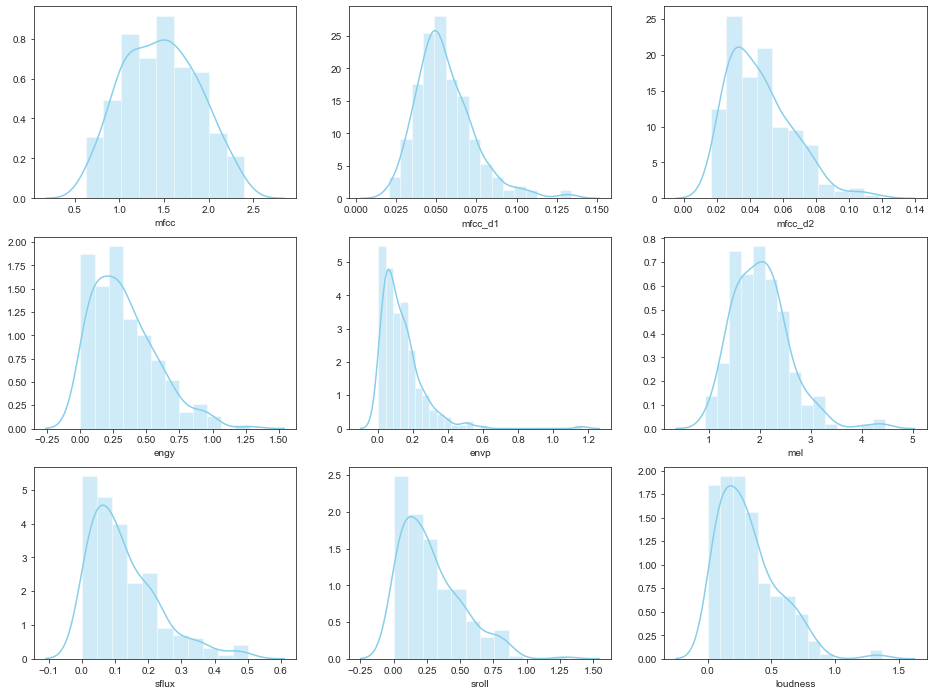

In [32]:
fig = plt.subplots(figsize=(16,12))
for i in range(len(feats_type)):
    ax = plt.subplot(3,3,i+1) 
    ax = sns.distplot(df[feats_type[i]][:], color="skyblue", vertical=False)
plt.show()

In [134]:
# read data
audio_type = ['chin','eng']
sub_IDs = ['S2','S3','S4','S5','S6','S7','S8','S9','S10','S11','S12','S13','S14','S15',
          'S16','S17','S18','S19','S20','S21','S22','S23','S24','S25','S26','S27','S28','S29']

miss = []
fa = []
hit = []
rt_miss = []
rt_fa = []
rt_hit = []

fa_names = []
miss_names = []
hit_names = []
rt_correct = []
rt_incorrect = []

df = pd.DataFrame() 

for i in range(len(sub_IDs)):
    miss.append([])
    fa.append([])
    hit.append([])
    rt_miss.append([])
    rt_fa.append([])
    rt_hit.append([])
    rt_correct.append([])
    rt_incorrect.append([])

    for j in range(len(audio_type)):
        if 1: # read from local repo
            url = '../lisTest/tcdDecision/recordings/New_recordings/'+audio_type[j]+'_'+sub_IDs[i]+'/keys.csv'
        else: # read from online repo
            url = 'https://raw.githubusercontent.com/neerajww/lang_tcd/venkat201097-test1/code/lisTest/tcdDecision/recordings/New_recordings/'+audio_type[j]+'_'+sub_IDs[i]+'/keys.csv'
        # load csv into a dataframe
        temp = pd.read_csv(url,header=None)
        temp['subID'] = i+1
        df = df.append(temp, ignore_index = True)
        
#         RT = (df[7].values - df[6].values)*1000 # in msec

In [135]:
df

,0,1,2,3,4,5,6,7,subID
0,7,./playback/STIMULI/chinese/wavFilesTest/BAC009...,1,1,TRAIN,0.0,7.302,7.978,1
1,1,./playback/STIMULI/chinese/wavFilesTest/BAC009...,1,1,TRAIN,0.0,6.282,6.787,1
2,6,./playback/STIMULI/chinese/wavFilesTest/BAC009...,1,1,TRAIN,0.0,5.754,6.209,1
3,2,./playback/STIMULI/chinese/wavFilesTest/BAC009...,2,2,TRAIN,0.0,7.001,7.453,1
4,8,./playback/STIMULI/chinese/wavFilesTest/BAC009...,1,2,TRAIN,0.0,7.391,8.875,1
...,...,...,...,...,...,...,...,...,...
6040,70,./playback/STIMULI/english/wavFilesTest/4044-9...,1,1,TEST,0.0,7.206,7.736,28
6041,25,./playback/STIMULI/english/wavFilesTest/1594-1...,2,2,TEST,0.0,7.117,7.976,28
6042,73,./playback/STIMULI/english/wavFilesTest/4137-1...,1,1,TEST,0.0,8.693,9.308,28
6043,13,./playback/STIMULI/english/wavFilesTest/1246-1...,2,2,TEST,0.0,6.977,7.760,28


In [256]:
DF = df.copy()
for i in range(len(feats_type)):
    DF[feats_type[i]] = 0
DF['lang'] = 0
DF['changeIns'] = 0

for i in range(len(DF)):
    for j in range(len(feats_distance)):
        fname = DF[1].values[i]
        head, tail = os.path.split(fname)
        if feats_distance[j][0] == tail[:-4]:
            for k in range(len(feats_type)):
                DF.loc[i,feats_type[k]] = feats_distance[j][3+k] 
            DF.loc[i,'lang'] = feats_distance[j][1] 
            DF.loc[i,'changeIns'] = feats_distance[j][2]
DF.rename(columns={0: "fIndex", 1: "fname",2:'label',3:'response',4:'session',5:'t_start',6:"t_end",7:"t_resp"},
          inplace = True)

In [257]:
DF

,fIndex,fname,label,response,session,t_start,t_end,t_resp,subID,mfcc,mfcc_d1,mfcc_d2,engy,envp,mel,sflux,sroll,loudness,lang,changeIns
0,7,./playback/STIMULI/chinese/wavFilesTest/BAC009...,1,1,TRAIN,0.0,7.302,7.978,1,1.254205,0.051411,0.033261,0.124479,0.083250,1.701534,0.007676,0.015771,0.175413,0,2.95
1,1,./playback/STIMULI/chinese/wavFilesTest/BAC009...,1,1,TRAIN,0.0,6.282,6.787,1,1.014843,0.038010,0.022139,0.144660,0.097207,2.331542,0.184177,0.336127,0.245178,0,3.12
2,6,./playback/STIMULI/chinese/wavFilesTest/BAC009...,1,1,TRAIN,0.0,5.754,6.209,1,1.036057,0.098763,0.064454,0.174241,0.138909,1.547115,0.012728,0.431800,0.041703,0,3.09
3,2,./playback/STIMULI/chinese/wavFilesTest/BAC009...,2,2,TRAIN,0.0,7.001,7.453,1,1.614091,0.060560,0.023909,0.295254,0.147335,2.082558,0.095941,0.047951,0.098128,0,3.45
4,8,./playback/STIMULI/chinese/wavFilesTest/BAC009...,1,2,TRAIN,0.0,7.391,8.875,1,1.953190,0.059631,0.040210,0.171694,0.317609,2.014714,0.299248,0.772622,0.148489,0,3.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,70,./playback/STIMULI/english/wavFilesTest/4044-9...,1,1,TEST,0.0,7.206,7.736,28,1.990685,0.052461,0.038258,0.536904,0.043858,2.401659,0.054167,0.031201,0.245713,1,3.17
6041,25,./playback/STIMULI/english/wavFilesTest/1594-1...,2,2,TEST,0.0,7.117,7.976,28,1.808708,0.075251,0.104611,0.969773,0.139013,2.945195,0.169983,0.391499,0.669273,1,3.56
6042,73,./playback/STIMULI/english/wavFilesTest/4137-1...,1,1,TEST,0.0,8.693,9.308,28,1.714368,0.035472,0.070055,0.491742,0.039873,2.479744,0.042761,0.101412,0.707925,1,3.69
6043,13,./playback/STIMULI/english/wavFilesTest/1246-1...,2,2,TEST,0.0,6.977,7.760,28,2.035032,0.048614,0.020857,0.191774,0.049055,2.362679,0.231664,0.412545,0.071451,1,3.60


In [258]:
DF.to_csv('./data/csvs/pooled_subject_response_acoustic_feats_data.csv',index=False) 

In [280]:
a = pd.read_csv('./data/csvs/pooled_subject_response_acoustic_feats_data.csv')  

In [281]:
a

,fIndex,fname,label,response,session,t_start,t_end,t_resp,subID,mfcc,mfcc_d1,mfcc_d2,engy,envp,mel,sflux,sroll,loudness,lang,changeIns
0,7,./playback/STIMULI/chinese/wavFilesTest/BAC009...,1,1,TRAIN,0.0,7.302,7.978,1,1.254205,0.051411,0.033261,0.124479,0.083250,1.701534,0.007676,0.015771,0.175413,0,2.95
1,1,./playback/STIMULI/chinese/wavFilesTest/BAC009...,1,1,TRAIN,0.0,6.282,6.787,1,1.014843,0.038010,0.022139,0.144660,0.097207,2.331542,0.184177,0.336127,0.245178,0,3.12
2,6,./playback/STIMULI/chinese/wavFilesTest/BAC009...,1,1,TRAIN,0.0,5.754,6.209,1,1.036057,0.098763,0.064454,0.174241,0.138909,1.547115,0.012728,0.431800,0.041703,0,3.09
3,2,./playback/STIMULI/chinese/wavFilesTest/BAC009...,2,2,TRAIN,0.0,7.001,7.453,1,1.614091,0.060560,0.023909,0.295254,0.147335,2.082558,0.095941,0.047951,0.098128,0,3.45
4,8,./playback/STIMULI/chinese/wavFilesTest/BAC009...,1,2,TRAIN,0.0,7.391,8.875,1,1.953190,0.059631,0.040210,0.171694,0.317609,2.014714,0.299248,0.772622,0.148489,0,3.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,70,./playback/STIMULI/english/wavFilesTest/4044-9...,1,1,TEST,0.0,7.206,7.736,28,1.990685,0.052461,0.038258,0.536904,0.043858,2.401659,0.054167,0.031201,0.245713,1,3.17
6041,25,./playback/STIMULI/english/wavFilesTest/1594-1...,2,2,TEST,0.0,7.117,7.976,28,1.808708,0.075251,0.104611,0.969773,0.139013,2.945195,0.169983,0.391499,0.669273,1,3.56
6042,73,./playback/STIMULI/english/wavFilesTest/4137-1...,1,1,TEST,0.0,8.693,9.308,28,1.714368,0.035472,0.070055,0.491742,0.039873,2.479744,0.042761,0.101412,0.707925,1,3.69
6043,13,./playback/STIMULI/english/wavFilesTest/1246-1...,2,2,TEST,0.0,6.977,7.760,28,2.035032,0.048614,0.020857,0.191774,0.049055,2.362679,0.231664,0.412545,0.071451,1,3.60


In [266]:
DF['RT'] = DF['t_resp'] - DF['t_end']
DF['label-response'] = DF['label'] - DF['response']
indx = []
indx.append(DF.loc[DF['session'] == 'TEST'].index.to_numpy())
indx.append(np.where(DF["label-response"].values ==0)[0])
indx.append(DF.loc[DF['lang'] == 0].index.to_numpy())
indx.append(DF.loc[DF['lang'] == 1].index.to_numpy())
indx.append(np.where(DF["RT"].values >.200)[0])
indx.append(np.where(DF["RT"].values <2)[0])
indx_correct = []
indx_correct.append(np.array(list(set(indx[0]) & set(indx[1]) & set(indx[2]) & set(indx[4]) & set(indx[5]))))
indx_correct.append(np.array(list(set(indx[0]) & set(indx[1]) & set(indx[3]) & set(indx[4]) & set(indx[5]))))

In [267]:
DF

,fIndex,fname,label,response,session,t_start,t_end,t_resp,subID,mfcc,...,engy,envp,mel,sflux,sroll,loudness,lang,changeIns,RT,label-response
0,7,./playback/STIMULI/chinese/wavFilesTest/BAC009...,1,1,TRAIN,0.0,7.302,7.978,1,1.254205,...,0.124479,0.083250,1.701534,0.007676,0.015771,0.175413,0,2.95,0.676,0
1,1,./playback/STIMULI/chinese/wavFilesTest/BAC009...,1,1,TRAIN,0.0,6.282,6.787,1,1.014843,...,0.144660,0.097207,2.331542,0.184177,0.336127,0.245178,0,3.12,0.505,0
2,6,./playback/STIMULI/chinese/wavFilesTest/BAC009...,1,1,TRAIN,0.0,5.754,6.209,1,1.036057,...,0.174241,0.138909,1.547115,0.012728,0.431800,0.041703,0,3.09,0.455,0
3,2,./playback/STIMULI/chinese/wavFilesTest/BAC009...,2,2,TRAIN,0.0,7.001,7.453,1,1.614091,...,0.295254,0.147335,2.082558,0.095941,0.047951,0.098128,0,3.45,0.452,0
4,8,./playback/STIMULI/chinese/wavFilesTest/BAC009...,1,2,TRAIN,0.0,7.391,8.875,1,1.953190,...,0.171694,0.317609,2.014714,0.299248,0.772622,0.148489,0,3.81,1.484,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6040,70,./playback/STIMULI/english/wavFilesTest/4044-9...,1,1,TEST,0.0,7.206,7.736,28,1.990685,...,0.536904,0.043858,2.401659,0.054167,0.031201,0.245713,1,3.17,0.530,0
6041,25,./playback/STIMULI/english/wavFilesTest/1594-1...,2,2,TEST,0.0,7.117,7.976,28,1.808708,...,0.969773,0.139013,2.945195,0.169983,0.391499,0.669273,1,3.56,0.859,0
6042,73,./playback/STIMULI/english/wavFilesTest/4137-1...,1,1,TEST,0.0,8.693,9.308,28,1.714368,...,0.491742,0.039873,2.479744,0.042761,0.101412,0.707925,1,3.69,0.615,0
6043,13,./playback/STIMULI/english/wavFilesTest/1246-1...,2,2,TEST,0.0,6.977,7.760,28,2.035032,...,0.191774,0.049055,2.362679,0.231664,0.412545,0.071451,1,3.60,0.783,0


In [275]:
DF_subset = DF.loc[indx_correct[0], :]
RT = DF_subset["RT"].values
features = DF_subset[feats_type].values

In [277]:
features.shape
RT.shape

(2078,)

In [278]:
import statsmodels.api as sm
# spector_data = sm.datasets.spector.load(as_pandas=False)
# spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)
# Fit and summarize OLS model
data_x = sm.add_constant(features,prepend=False)
data_y = RT.copy()
mod = sm.OLS(data_y, data_x)

In [279]:
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     5.731
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           6.87e-08
Time:                        22:53:10   Log-Likelihood:                -468.27
No. Observations:                2078   AIC:                             956.5
Df Residuals:                    2068   BIC:                             1013.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0892      0.021     -4.294      0.0